Nama : Muhammad Fadli Ramadhan

Gmail : fadlinisasileader@gmail.com

Proyek Pertama Membuat Model NLP TensorFlow (datasets: >2000)

Senin, 13 September 2021

In [8]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving test.txt to test (1).txt
Saving train.txt to train (1).txt
Saving val.txt to val (1).txt


In [9]:
# Read Dataset
import pandas as pd
train = pd.read_csv('train.txt', sep=';', names=['sentences', 'feelings'])
test = pd.read_csv('test.txt', sep=';', names=['sentences', 'feelings'])
val = pd.read_csv('val.txt', sep=';', names=['sentences', 'feelings'])
df = train.append(test)
df = df.append(val)
df

,sentences,feelings
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,i cannot help but feel insulted that my master...,anger
1996,i almost feel hesitant to write about this it ...,fear
1997,i struggle with those pressures when i don t f...,sadness
1998,i feel as if there is anyone who really unders...,anger


In [10]:
# Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  20000 non-null  object
 1   feelings   20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [11]:
# Cek Null
df.isna().sum()

sentences    0
feelings     0
dtype: int64

In [12]:
# Cek data yang terduplikat
df.duplicated().sum()

1

In [13]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [14]:
# One Hot Encoding Label
category = pd.get_dummies(df['feelings'])
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='feelings')
df_baru.tail()

,sentences,anger,fear,joy,love,sadness,surprise
1995,i cannot help but feel insulted that my master...,1,0,0,0,0,0
1996,i almost feel hesitant to write about this it ...,0,1,0,0,0,0
1997,i struggle with those pressures when i don t f...,0,0,0,0,1,0
1998,i feel as if there is anyone who really unders...,1,0,0,0,0,0
1999,i know jack and he doesnt give up on men easy ...,0,0,1,0,0,0


In [15]:
# Melakukan train test split
sinopsis = df_baru['sentences'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

from sklearn.model_selection import train_test_split
# Rasio train 80% dan test 20%
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)


In [16]:
# Mencari dan menghitung banyak kata
from collections import Counter

def counter_words(text):
  count = Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

sentence = df_baru['sentences']
counter = counter_words(sentence)
num_words = len(counter)
num_words

17096

In [17]:
# Melakukan tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test= tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [18]:
# Arsitektur Model (Sequential, Embedding, LSTM)
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=num_words, output_dim=64),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(6, activation='softmax')                            
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [20]:
# Melatih Model 
history = model.fit(padded_latih, label_latih, epochs=10,
                    validation_data=(padded_test, label_test),
                    verbose=1)

Epoch 1/10
500/500 [==============================] - 46s 92ms/step - loss: 0.1545 - accuracy: 0.9459 - val_loss: 0.1984 - val_accuracy: 0.9230
Epoch 2/10
500/500 [==============================] - 46s 92ms/step - loss: 0.1294 - accuracy: 0.9542 - val_loss: 0.2266 - val_accuracy: 0.9237
Epoch 3/10
500/500 [==============================] - 46s 92ms/step - loss: 0.1136 - accuracy: 0.9575 - val_loss: 0.2166 - val_accuracy: 0.9280
Epoch 4/10
500/500 [==============================] - 46s 91ms/step - loss: 0.1019 - accuracy: 0.9638 - val_loss: 0.2023 - val_accuracy: 0.9300
Epoch 5/10
500/500 [==============================] - 45s 91ms/step - loss: 0.0916 - accuracy: 0.9674 - val_loss: 0.2521 - val_accuracy: 0.9250
Epoch 6/10
500/500 [==============================] - 45s 90ms/step - loss: 0.0862 - accuracy: 0.9711 - val_loss: 0.3095 - val_accuracy: 0.9255
Epoch 7/10
500/500 [==============================] - 45s 91ms/step - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0.2316 - val_accuracy:

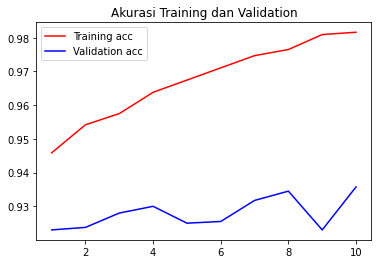

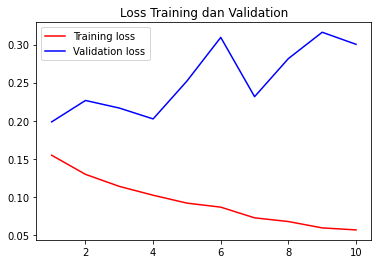

In [21]:
import matplotlib.pyplot as plt

# inisiasi akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Akurasi
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Akurasi Training dan Validation')
plt.legend()

# Plot Loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss Training dan Validation')
plt.legend()

plt.show()

In [22]:
# Memanggil fungsi Callback
# inisiasi callback dengan syarat diatas 91%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy') > 0.91) & (logs.get('accuracy') > 0.91):
      print('\Akurasi telah mencapai >91%')
      self.model.stop_training = True
callbacks = myCallback()      

Epoch 1/30
500/500 [==============================] - 45s 90ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.4025 - val_accuracy: 0.9308
\Akurasi telah mencapai >91%


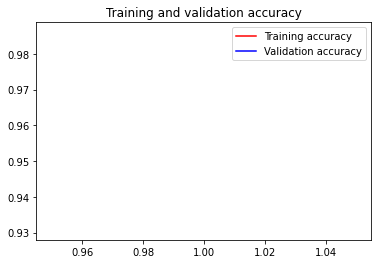

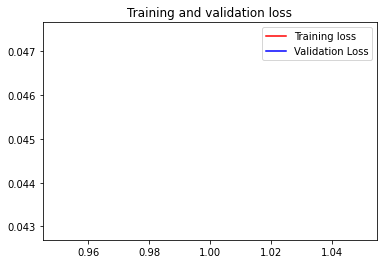

In [25]:
# Melatih Model fungsi callback

history = model.fit(
    padded_latih, label_latih, epochs=30,
    validation_data=(padded_test, label_test),
    callbacks=callbacks,
    verbose=1
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot akurasi
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
